In [2]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
 x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x)

3.1

In [4]:
np.median(x)

3.0

In [5]:
 x.min(), x.max()

(0.9, 6.7)

In [6]:
 x.var()

3.0700000000000007

In [7]:
 x.std()

1.7521415467935233

In [8]:
 x.var(ddof=1)

3.5085714285714293

In [9]:
x.std(ddof=1)

1.8731181032095732

In [10]:
np.random.rand()

0.9333384288179616

In [11]:
np.random.randn()

-0.9426916240041707

In [12]:
 np.random.rand(5)

array([0.48284035, 0.37728601, 0.78833503, 0.84069028, 0.06849711])

In [13]:
 np.random.randn(2, 4)

array([[-0.03720569, -0.3964472 ,  0.18060195,  0.69302394],
       [ 2.28326029,  1.67118006,  1.52244637, -1.77993   ]])

In [14]:
 np.random.randint(10, size=10)

array([6, 7, 2, 9, 0, 4, 3, 1, 0, 5])

In [15]:
 np.random.randint(low=10, high=20, size=(2, 10))

array([[14, 10, 14, 17, 17, 16, 11, 14, 17, 13],
       [17, 10, 11, 18, 18, 14, 19, 15, 13, 12]])

Text(0.5, 1.0, 'randint(low=1, high=10)')

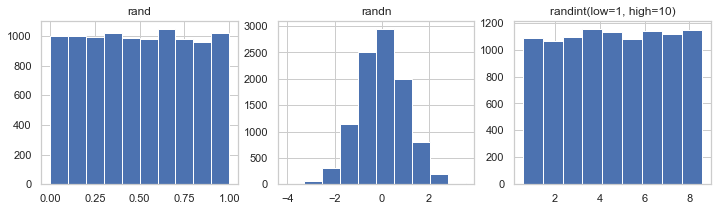

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
...: axes[0].hist(np.random.rand(10000))
...: axes[0].set_title("rand")
...: axes[1].hist(np.random.randn(10000))
...: axes[1].set_title("randn")
...: axes[2].hist(np.random.randint(low=1, high=10, size=10000),
bins=9, align='left')
...: axes[2].set_title("randint(low=1, high=10)")

In [17]:
 np.random.choice(10, 5, replace=False)

array([5, 7, 3, 0, 2])

In [18]:
 np.random.seed(123456789)
np.random.rand()

0.532833024789759

In [19]:
 np.random.seed(123456789); np.random.rand()

0.532833024789759

In [20]:
prng = np.random.RandomState(123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [21]:
 prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [22]:
 prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [23]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [24]:
 prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [25]:
 prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

In [26]:
 X = stats.norm(1, 0.5)

In [27]:
X.mean()

1.0

In [28]:
 X.median()

1.0

In [29]:
 X.std()

0.5

In [30]:
 X.var()

0.25

In [31]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [32]:
 X.stats()

(array(1.), array(0.25))

In [33]:
 X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [34]:
 X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [35]:
 X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [36]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [42]:
def plot_rv_distribution(X, axes=None):"""Plot the PDF or PMF, CDF, SF and PPF of a given random variable"""

In [44]:
if axes is None:
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))

In [45]:
x_min_999, x_max_999 = X.interval(0.999)
...: x999 = np.linspace(x_min_999, x_max_999, 1000)
...: x_min_95, x_max_95 = X.interval(0.95)
...: x95 = np.linspace(x_min_95, x_max_95, 1000)

In [51]:
if hasattr(X.dist, "pdf"):
    axes[0].plot(x999, X.pdf(x999), label="PDF")
    axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
else:
    # discrete random variables do not have a pdf method,instead we use pmf:
    x999_int = np.unique(x999.astype(int))
    axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
for ax in axes:
    ax.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'Poisson dist.')

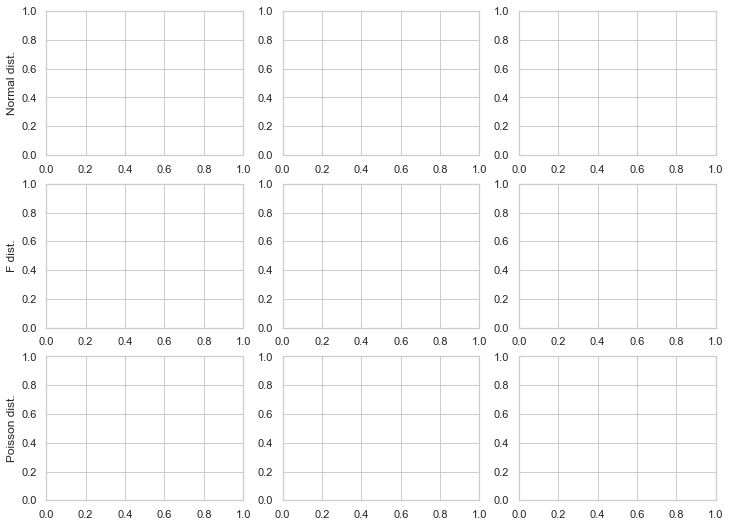

In [52]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
...: X = stats.norm()
...: plot_rv_distribution(X, axes=axes[0, :])
...: axes[0, 0].set_ylabel("Normal dist.")
...: X = stats.f(2, 50)
...: plot_rv_distribution(X, axes=axes[1, :])
...: axes[1, 0].set_ylabel("F dist.")
...: X = stats.poisson(5)
...: plot_rv_distribution(X, axes=axes[2, :])
...: axes[2, 0].set_ylabel("Poisson dist.")

In [53]:
 stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [54]:
 stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [55]:
 X = stats.norm(1, 0.5)
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

In [62]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(4.462691383874782, 0.23476735556603134, 1.0414809634088629)

In [63]:
 Y = stats.chi2(df=df, loc=loc, scale=scale)

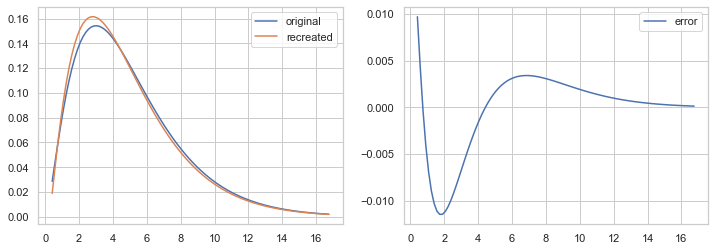

In [64]:
 fig, axes = plt.subplots(1, 2, figsize=(12, 4))
...: x_lim = X.interval(.99)
...: x = np.linspace(*x_lim, num=100)
...:
...: axes[0].plot(x, X.pdf(x), label="original")
...: axes[0].plot(x, Y.pdf(x), label="recreated")
...: axes[0].legend()
...:
...: axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
...: axes[1].legend()

In [65]:
 mu0, mu, sigma = 1.0, 0.8, 0.5
In [58]: X = stats.norm(mu, sigma)
In [59]: n = 100
In [60]: X_samples = X.rvs(n)

In [66]:
 z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
In [62]: z

-3.906124602231633

In [67]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
In [64]: t

-3.8342230679090616

In [68]:
 stats.norm().ppf(0.025)

-1.9599639845400545

In [69]:
 2 * stats.norm().cdf(-abs(z))

9.378816317098331e-05

In [70]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.0002215635781151231

In [71]:
 t, p = stats.ttest_1samp(X_samples, mu)

In [72]:
t

0.09214739730191104

In [73]:
p

0.9267671386423376

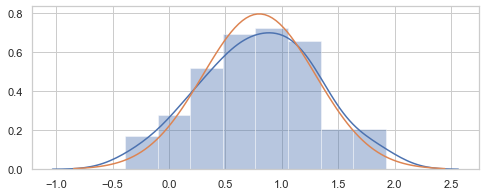

In [74]:
 fig, ax = plt.subplots(figsize=(8, 3))
...: sns.distplot(X_samples, ax=ax)
...: x = np.linspace(*X.interval(0.999), num=100)
...: ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

In [75]:
 n, sigma = 50, 1.0
In [73]: mu1, mu2 = np.random.rand(2)
In [74]: X1 = stats.norm(mu1, sigma)
In [75]: X1_sample = X1.rvs(n)
In [76]: X2 = stats.norm(mu2, sigma)
In [77]: X2_sample = X2.rvs(n)

In [76]:
t, p = stats.ttest_ind(X1_sample, X2_sample)
In [79]: t

5.031703895540012

In [77]:
p

2.204628163655951e-06

In [78]:
 mu1, mu2

(0.9201470687864468, 0.03752979914991739)

In [79]:
 X = stats.chi2(df=5)
In [83]: X_samples = X.rvs(100)

In [80]:
kde = stats.kde.gaussian_kde(X_samples)

In [81]:
 kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

D:\Download\python\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


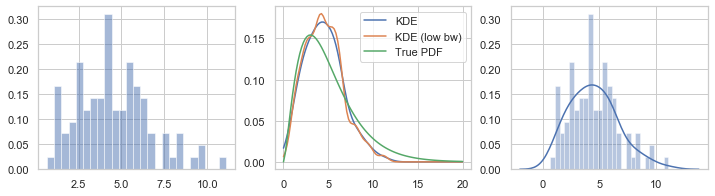

In [82]:
x = np.linspace(0, 20, 100)
In [87]: fig, axes = plt.subplots(1, 3, figsize=(12, 3))
...: axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
...: axes[1].plot(x, kde(x), label="KDE")
...: axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
...: axes[1].plot(x, X.pdf(x), label="True PDF")
...: axes[1].legend()
...: sns.distplot(X_samples, bins=25, ax=axes[2])

In [83]:
kde.resample(10)

array([[ 2.19337918,  1.96549866, 12.32057377,  5.56181302,  1.95872602,
         4.71871605,  4.40957806,  6.93288205,  0.59937313,  7.09806877]])

In [86]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)

In [88]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.
dataset.mean(), args=(q,))[0]

In [89]:
 kde_ppf = np.vectorize(_kde_ppf)

In [90]:
 kde_ppf([0.05, 0.95])

array([1.07280779, 8.66262648])